In [10]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pickle
import h5py
from copy import deepcopy

In [11]:
with open('/home/lhertel/projects/physicsprojects/nova/simple/predictions/electron_prong_energy_scaled_0_500.pkl', 'r') as f:
    results = pickle.load(f)

In [12]:
with h5py.File('../../main/predictions/energy_cluster_vertex_inception_train_mae_no_dropout_weighted_point8_to_1point5_0_to_400_tested_on_400_500') as f:
    pred_e = deepcopy(f['pred_e'].value)
    true_e = deepcopy(f['true_e'].value)
prev_results = {'resolution': pred_e.reshape((-1,))/true_e.reshape((-1,)), 'y':true_e, 'yhat':pred_e}

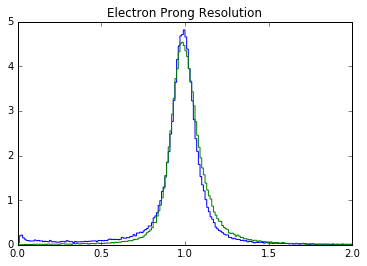

In [14]:
fig, axes = plt.subplots()
hist = axes.hist(results['resolution'], bins=200, normed=1, range=(0,2), histtype='step')
prev_hist = axes.hist(prev_results['resolution'], bins=200, normed=1, range=(0,2), histtype='step', color='green')
axes.set_title("Electron Prong Resolution")

In [15]:
with open('/home/lhertel/projects/physicsprojects/nova/simple/predictions/muon_prong_energy_scaled_0_500.pkl', 'r') as f:
    results = pickle.load(f)

In [17]:
dat = np.load('../../main/predictions/muon_prong_401to500.npy')
true_e = dat[:,0]
pred_e = dat[:,1]
sh_e = dat[:, 2]
nn_resolution = pred_e/true_e

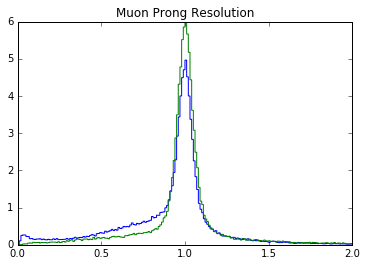

In [18]:
fig, axes = plt.subplots()
hist = axes.hist(results['resolution'], bins=200, normed=1, range=(0,2), histtype='step')
hist = axes.hist(nn_resolution, bins=200, normed=1, range=(0,2), histtype='step')
axes.set_title("Muon Prong Resolution")

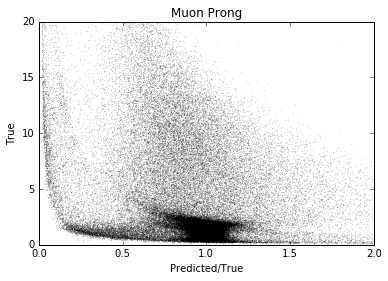

In [34]:
fig, axes = plt.subplots()
axes.scatter(results['resolution'], results['y'], marker='.', s=0.01)
axes.set_xlim([0, 2.0])
axes.set_ylim([0, 20.0])
axes.set_xlabel('Predicted/True')
axes.set_ylabel('True')
axes.set_title('Muon Prong')